<a href="https://www.analytiksinc.com">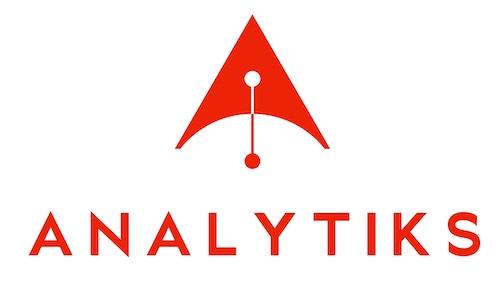</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

# Clustering stocks using KMeans

<b>Dataset:</b> <i> Company Stock Movements.csv</i>

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

#### Normalizer vs StandardScaler 
Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [7]:
#KMeans clustering Algorithm
from sklearn.cluster import KMeans

#Hierarchical clustering
from scipy.cluster import hierarchy

from sklearn.preprocessing import Normalizer

## Load and Explore the Dataset

In [92]:
df = pd.read_csv('../Datasets/Company Stock Movements.csv')

In [93]:
df.head()

,Unnamed: 0,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 29/10/2013
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [95]:
df.describe()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197502,-0.202501,-0.097504,-0.035000
50%,0.295000,0.010001,-0.005000,0.084993,0.150000,-0.059998,0.070000,0.205002,0.139999,-0.360000,...,0.335005,0.454998,0.035002,0.000000,0.175000,-0.085000,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.804999,1.139999,0.345000,0.192502,0.577495,0.147498,0.382501,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


## Normalize the Dataset

In [96]:
companies = df[df.columns[0]]
companies.name = 'Company'
companies.head()

0               Apple
1                 AIG
2              Amazon
3    American express
4              Boeing
Name: Company, dtype: object

In [97]:
cols = df.columns
cols = cols[1:]
cols

Index(['04/01/2010', '05/01/2010', '06/01/2010', '07/01/2010', '08/01/2010',
       '11/01/2010', '12/01/2010', '13/01/2010', '14/01/2010', '15/01/2010',
       ...
       '16/10/2013', '17/10/2013', '18/10/2013', '21/10/2013', '22/10/2013',
       '23/10/2013', '24/10/2013', '25/10/2013', '28/10/2013', '29/10/2013'],
      dtype='object', length=963)

In [98]:
df.set_index(df.columns[0], inplace=True)

In [99]:
df.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [100]:
scaler = Normalizer()

scaler.fit(df)

arr_norm = scaler.transform(df)

In [101]:
arr_norm.shape

(60, 963)

In [102]:
df_norm = pd.DataFrame(arr_norm)
df_norm = df_norm.set_index(companies)
df_norm.columns = cols
df_norm.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
Apple,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.001667,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020
AIG,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.037366,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806
Amazon,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.019834,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156
American express,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.032231,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595
Boeing,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.053043,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541


In [103]:
df_norm.describe()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.019058,0.006312,0.000630,0.008985,0.013988,-0.003763,0.003154,0.014999,0.011125,-0.023272,...,0.023372,0.039079,0.012262,-0.003902,0.010560,-0.000093,0.001207,0.005747,0.013558,0.013013
std,0.029663,0.026387,0.024068,0.031485,0.022541,0.026291,0.028238,0.020361,0.025086,0.023275,...,0.028440,0.029394,0.031121,0.029678,0.031763,0.043953,0.036643,0.029733,0.027686,0.028953
min,-0.093285,-0.042849,-0.076951,-0.066895,-0.029658,-0.051388,-0.089504,-0.033751,-0.055975,-0.079213,...,-0.090966,-0.018364,-0.033487,-0.132207,-0.086750,-0.074120,-0.192058,-0.059550,-0.030029,-0.102020
25%,0.002430,-0.011077,-0.013759,-0.008433,-0.002362,-0.018580,-0.014310,0.001206,-0.003773,-0.035189,...,0.005121,0.020712,-0.004329,-0.018426,-0.002539,-0.023016,-0.017505,-0.012794,-0.006795,-0.003969
50%,0.017661,0.000643,-0.000602,0.007894,0.009476,-0.007362,0.003353,0.013330,0.010571,-0.021445,...,0.028338,0.033181,0.003037,0.000000,0.012190,-0.006401,0.002063,-0.000519,0.004233,0.010900
75%,0.036287,0.016366,0.017834,0.027802,0.030580,0.007766,0.025252,0.027603,0.026941,-0.007862,...,0.042096,0.065572,0.024872,0.010789,0.030823,0.007578,0.020731,0.017854,0.030382,0.023201
max,0.098275,0.074839,0.052703,0.112810,0.060058,0.082887,0.063844,0.071277,0.067208,0.031842,...,0.080407,0.109404,0.152285,0.049943,0.082647,0.146723,0.079898,0.087687,0.096387,0.096255


## Run K Means
<i> Make sure to use the Normalized dataset and set random_state to 30 </i>

### Find the optimal k

#### Elbow method

In [142]:
df_norm.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
Apple,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.001667,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020
AIG,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.037366,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806
Amazon,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.019834,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156
American express,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.032231,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595
Boeing,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.053043,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541


In [143]:
#Set range for k
range_n_clusters= np.arange(2, 50)

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=30) 
    
    #Fit to the right Dataframe
    kmeans.fit(df_norm)
    
    #Get the SSE
    score = kmeans.inertia_
    
    #Append to the empty list created earlier
    scores.append(score)
    
    #Print for visibility
#     print(str(i) +"\t" +str(score))

Text(0, 0.5, 'Score')

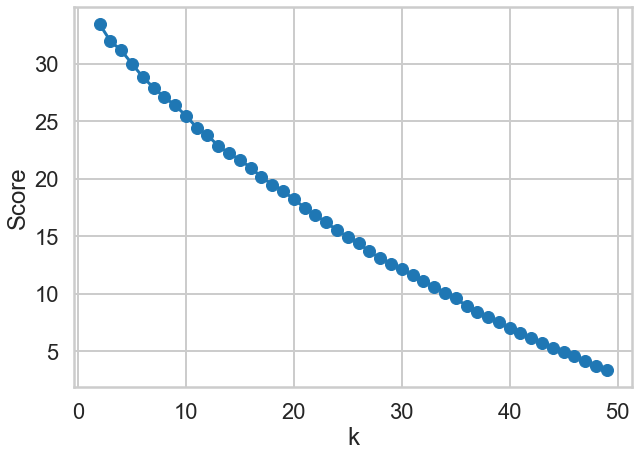

In [144]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

Elbow method doesn't seem to work for finding the optimal 'k'

#### Silhouette method

In [145]:
#Import the Silhouette Functions from sklearn and colormap from matplotlib
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [146]:
#Example for range of "k"

#Set range for k
range_n_clusters= np.arange(2,60)

scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=30)
    
    #Fit to the correct dataframe
    kmeans.fit(df_norm)
    
    #Get the Silhouette Score
    sil_score = silhouette_score(df_norm,kmeans.labels_, random_state=30)
    
    scores.append(list([i, sil_score]))
    #Print the  Silhouette Scores
#     print("%s \t %.2f" % (i, sil_score))

In [147]:
pd.DataFrame(scores, columns = ['k', 'sil_scores']).set_index('k') \
.sort_values(by='sil_scores', ascending=False)

,sil_scores
k,
2,0.085905
24,0.062339
23,0.062230
27,0.061708
28,0.061134
26,0.059963
29,0.059858
25,0.056980
20,0.056553


Silhouette analysis suggests that a k=2 is optimal, but k=23,24 will also do.

### Run K Means

In [148]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=23, max_iter=1000, random_state=30)

#Fit to the data
kmeans.fit(df_norm)

KMeans(max_iter=1000, n_clusters=23, random_state=30)

### List Stocks and their Labels / Clusters in a DataFrame to report which Stocks move together

In [150]:
#Output of K-Means is the cluster label
k23_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k23 = df_norm.copy()
df_k23['Label'] = k23_labels
df_k23.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013,Label
Company,,,,,,,,,,,,,,,,,,,,,
Apple,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020,10
AIG,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806,2
Amazon,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156,6
American express,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595,0
Boeing,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541,9


In [151]:
df_k23['Label'].value_counts()

0     8
3     8
4     6
2     5
17    5
9     3
10    2
1     2
5     2
6     2
22    2
12    2
13    2
11    2
21    1
8     1
7     1
14    1
15    1
16    1
18    1
19    1
20    1
Name: Label, dtype: int64

In [159]:
clusters = dict(df_k23.groupby('Label').groups)
clusters

{0: Index(['American express', 'Caterpillar', 'DuPont de Nemours',
        'General Electrics', 'Home Depot', 'IBM', '3M', 'Symantec'],
       dtype='object', name='Company'),
 1: Index(['Johnson & Johnson', 'Pfizer'], dtype='object', name='Company'),
 2: Index(['AIG', 'Bank of America', 'Goldman Sachs', 'JPMorgan Chase',
        'Wells Fargo'],
       dtype='object', name='Company'),
 3: Index(['British American Tobacco', 'GlaxoSmithKline', 'Novartis',
        'Royal Dutch Shell', 'SAP', 'Sanofi-Aventis', 'Total', 'Unilever'],
       dtype='object', name='Company'),
 4: Index(['Canon', 'Ford', 'Honda', 'Mitsubishi', 'Sony', 'Toyota'], dtype='object', name='Company'),
 5: Index(['Colgate-Palmolive', 'Procter Gamble'], dtype='object', name='Company'),
 6: Index(['Amazon', 'Yahoo'], dtype='object', name='Company'),
 7: Index(['Philip Morris'], dtype='object', name='Company'),
 8: Index(['Navistar'], dtype='object', name='Company'),
 9: Index(['Boeing', 'Lookheed Martin', 'Northrop Grumma

In [206]:
df_clus = pd.DataFrame()
pd.DataFrame()
for j in range(len(clusters)):
    df_clus = pd.concat( [ df_clus, pd.Series(clusters[j], name="Cluster %s" % j) ] , axis=1)
    
df_clus = df_clus.fillna('-')
df_clus

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,...,Cluster 13,Cluster 14,Cluster 15,Cluster 16,Cluster 17,Cluster 18,Cluster 19,Cluster 20,Cluster 21,Cluster 22
0,American express,Johnson & Johnson,AIG,British American Tobacco,Canon,Colgate-Palmolive,Amazon,Philip Morris,Navistar,Boeing,...,Dell,Wal-Mart,Walgreen,MasterCard,ConocoPhillips,McDonalds,Xerox,Taiwan Semiconductor Manufacturing,Kimberly-Clark,Coca Cola
1,Caterpillar,Pfizer,Bank of America,GlaxoSmithKline,Ford,Procter Gamble,Yahoo,-,-,Lookheed Martin,...,HP,-,-,-,Chevron,-,-,-,-,Pepsi
2,DuPont de Nemours,-,Goldman Sachs,Novartis,Honda,-,-,-,-,Northrop Grumman,...,-,-,-,-,Schlumberger,-,-,-,-,-
3,General Electrics,-,JPMorgan Chase,Royal Dutch Shell,Mitsubishi,-,-,-,-,-,...,-,-,-,-,Valero Energy,-,-,-,-,-
4,Home Depot,-,Wells Fargo,SAP,Sony,-,-,-,-,-,...,-,-,-,-,Exxon,-,-,-,-,-
5,IBM,-,-,Sanofi-Aventis,Toyota,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
6,3M,-,-,Total,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
7,Symantec,-,-,Unilever,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


## Run Hierarchical Clustering and Visualize as a Dendogram

In [182]:
df_norm.head()

,04/01/2010,05/01/2010,06/01/2010,07/01/2010,08/01/2010,11/01/2010,12/01/2010,13/01/2010,14/01/2010,15/01/2010,...,16/10/2013,17/10/2013,18/10/2013,21/10/2013,22/10/2013,23/10/2013,24/10/2013,25/10/2013,28/10/2013,29/10/2013
Company,,,,,,,,,,,,,,,,,,,,,
Apple,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.001667,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020
AIG,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.037366,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806
Amazon,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.019834,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156
American express,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.032231,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595
Boeing,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.053043,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541


In [183]:
#Instantiate the Algorithm
#Linkage performs hierarchical/agglomerative clustering.

linked_full = hierarchy.linkage(df_norm, method='single')

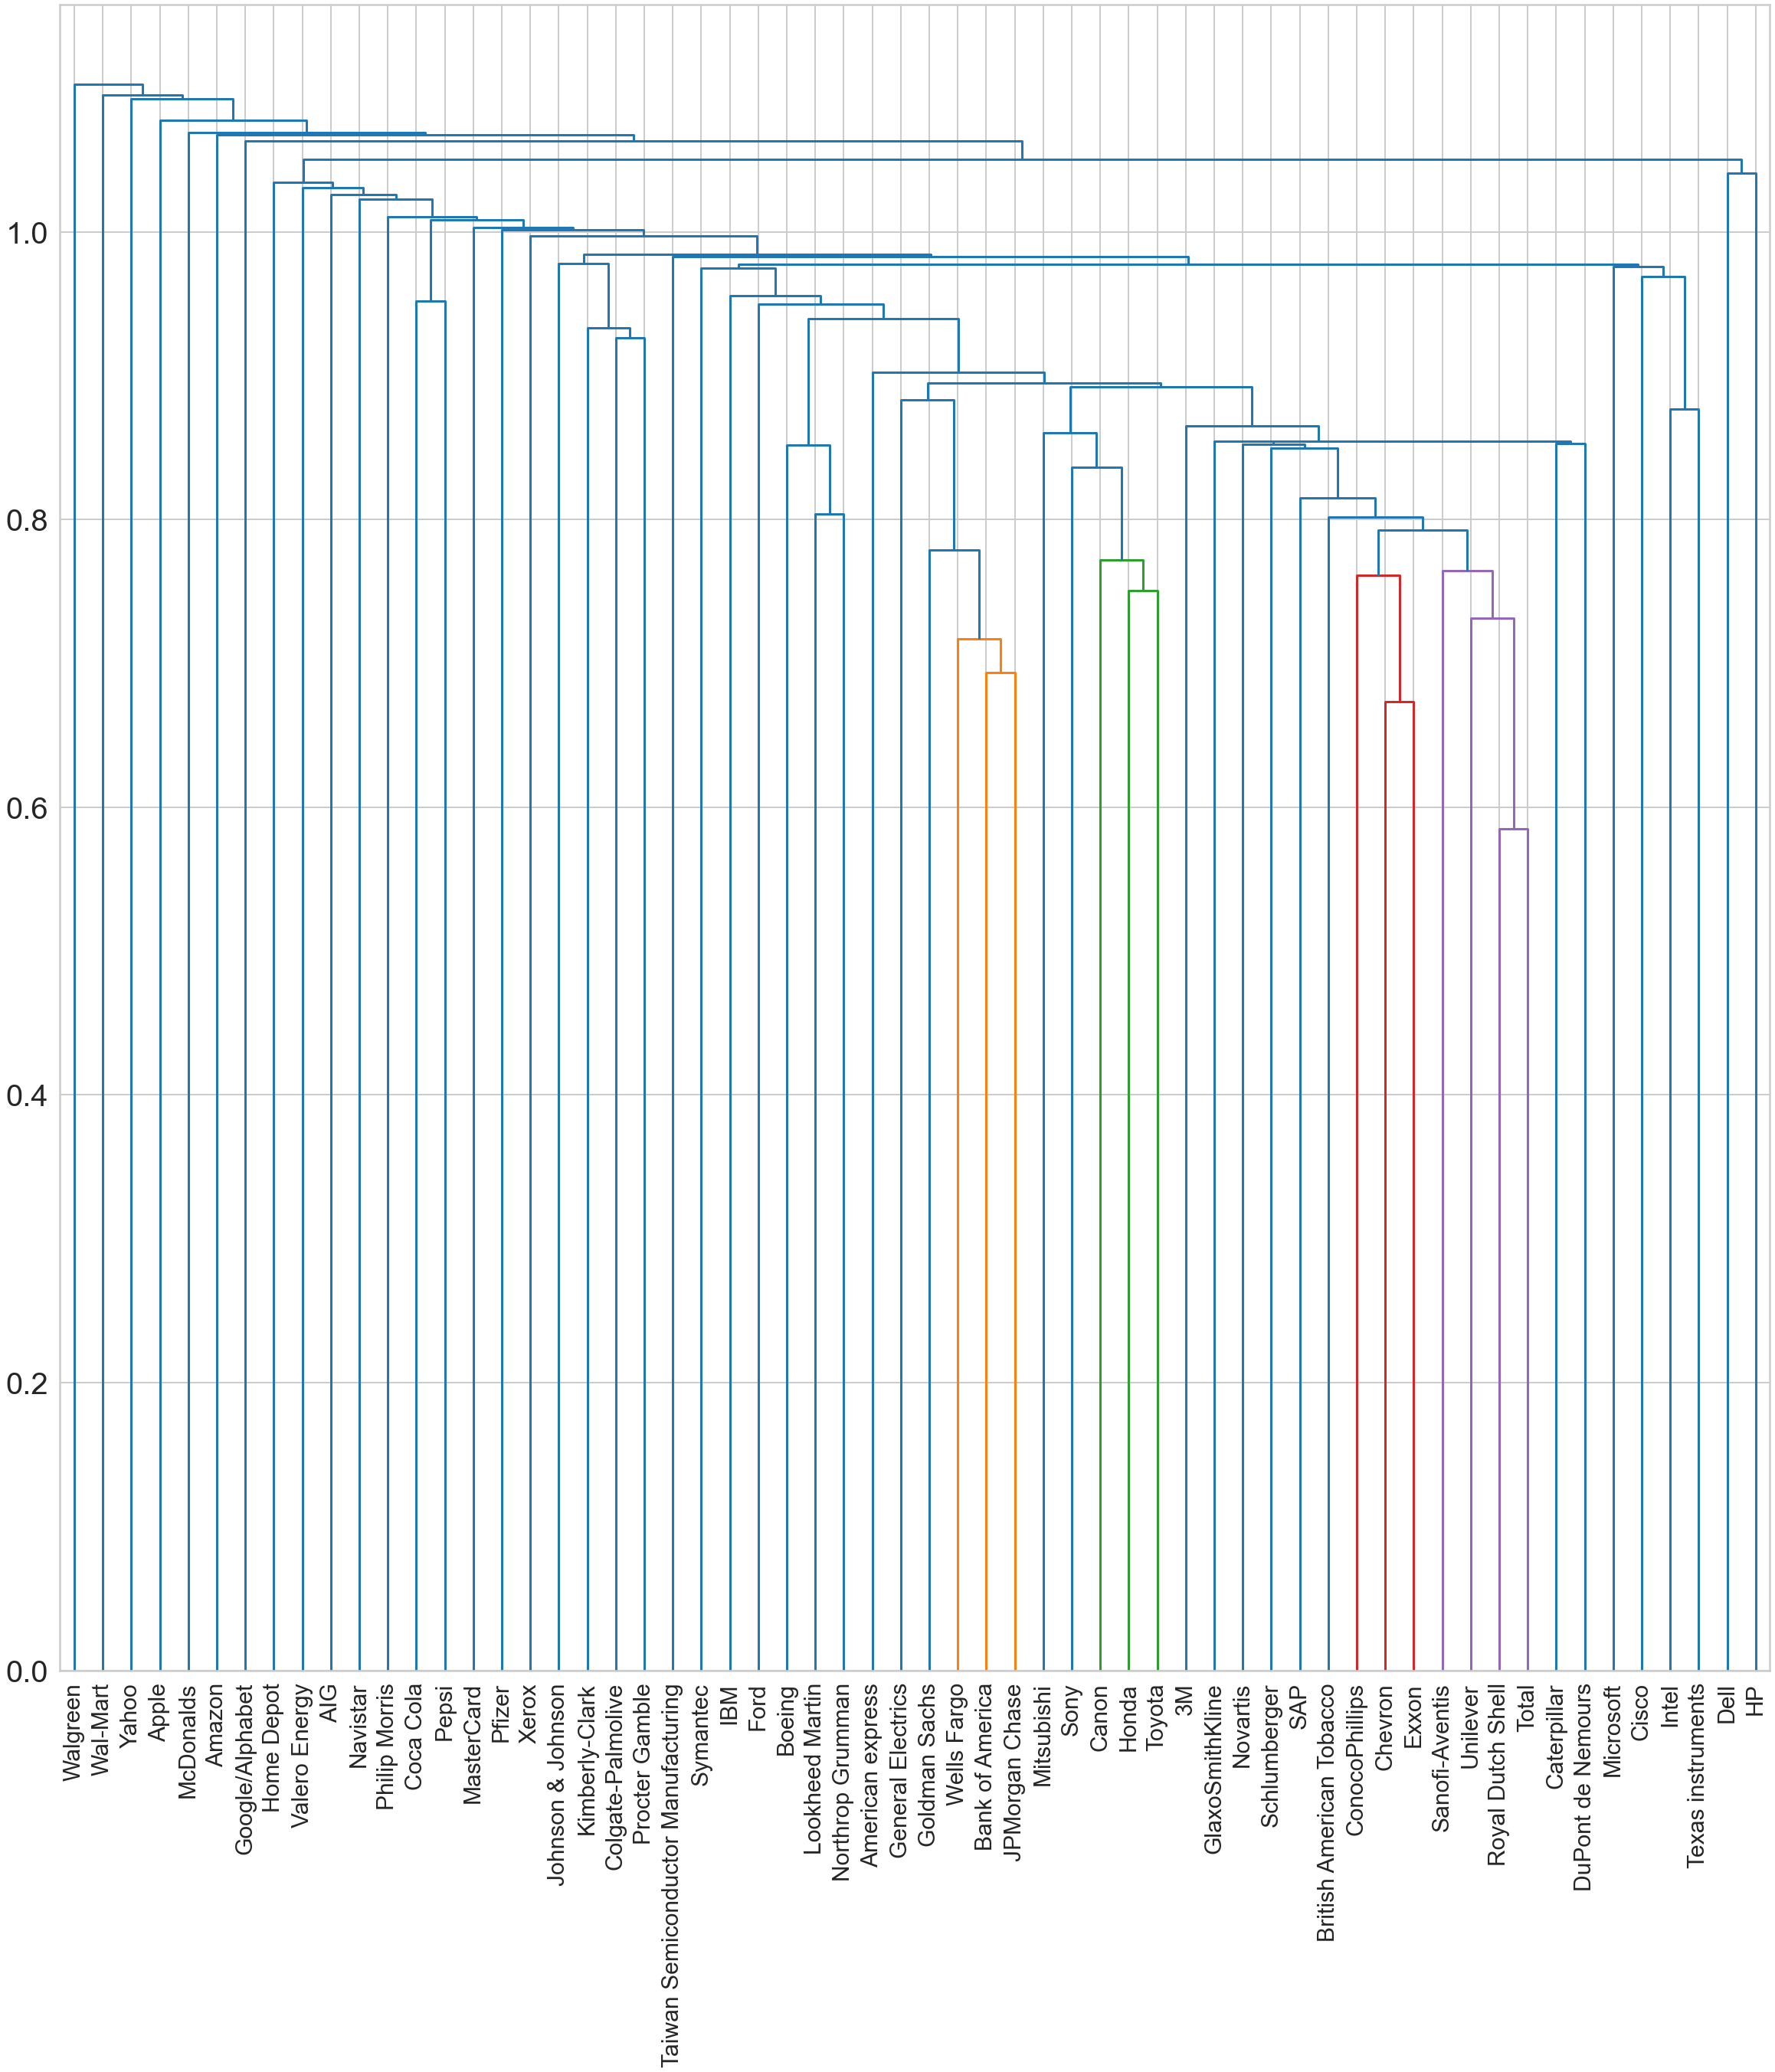

In [211]:
plt.figure(figsize=(40, 40))  
hierarchy.dendrogram(linked_full,  
            orientation='top',
            p=60,
            distance_sort='descending',
            truncate_mode='level', labels = df_norm.index)

plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=40)
plt.show()